# GameStop 90 Day Data Grab
## Connor Moore
## 11 July 2021

### Introduction

Code imports daily stock price and interest over time over last 90 days (4/1/2021 to 6/30/2021) for GameStop stock (GME)

### Import

In [1]:
# import pip

import yfinance as yf
import pandas as pd

from pytrends.request import TrendReq

import numpy as np

%matplotlib inline

import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from datetime import date
import os

today = date.today()  # Todays date
dataDir = r"./Data Files/"


def get_data(ticker):
    if os.path.exists(f"{dataDir}{ticker}_{today}.csv"):
        #Get stored data
        stored_data = pd.read_csv(f"{dataDir}{ticker}_{today}.csv")
        return stored_data
    else:
        #Get new data

        # Connect to Google API
        pytrends = TrendReq(hl='en-US', tz=360)

        # Set Keyword
        kw_list = [ticker]

        # Build Payload
        pytrends.build_payload(kw_list, timeframe='2021-04-01 2021-06-30', geo='')

        # Get trends Data frame
        trend_data = pytrends.interest_over_time()
        trend_data.rename(columns = {ticker: "Search Interest"},inplace = True)

        # Get Stock Data
        stock_data = yf.download(ticker, start="2021-04-01", end="2021-06-30", interval="1d")

        # Combine Data
        new_data = pd.concat([stock_data, trend_data], axis = 1, join = 'inner')

        new_data.rename(columns = {"Unnamed: 0	": "Date"},inplace = True)

        # Export to data folder
        new_data.to_csv(f"{dataDir}{ticker}_{today}.csv")

        return new_data


In [4]:
# Connect to Google API
#pytrends = TrendReq(hl='en-US', tz=360)

get_data("GME")

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,GME,isPartial
0,2021-04-01,193.360001,196.970001,183.600006,191.449997,191.449997,9334300,72,False
1,2021-04-05,171.000000,195.000000,164.809998,186.949997,186.949997,14070500,67,False
2,2021-04-06,185.210007,192.000000,183.559998,184.500000,184.500000,6218300,59,False
3,2021-04-07,183.220001,184.500000,176.110001,177.970001,177.970001,4768300,52,False
4,2021-04-08,185.880005,185.880005,164.300003,170.259995,170.259995,10047400,53,False
...,...,...,...,...,...,...,...,...,...
57,2021-06-23,221.449997,222.570007,214.119995,219.339996,219.339996,3555100,43,False
58,2021-06-24,221.160004,227.449997,211.600006,212.309998,212.309998,3863300,36,False
59,2021-06-25,214.000000,214.199997,198.500000,209.509995,209.509995,12692700,33,False
60,2021-06-28,211.250000,224.449997,210.199997,213.250000,213.250000,4879400,33,False


In [73]:
# Set Keyword
kw_list = ['GME']

# Build Payload
pytrends.build_payload(kw_list, timeframe='2021-04-01 2021-06-30', geo='')


In [5]:
# Get trends Data frame
GME_trends = pytrends.interest_over_time()
GME_trends.rename(columns = {"GME": "Google Searches"},
          inplace = True)

GME_trends


NameError: name 'pytrends' is not defined

In [75]:
# Get stock Data Frame

GME_stock = yf.download("GME", start="2021-04-01", end="2021-06-30", interval="1d")
GME_stock



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,193.360001,196.970001,183.600006,191.449997,191.449997,9334300
2021-04-05,171.000000,195.000000,164.809998,186.949997,186.949997,14070500
2021-04-06,185.210007,192.000000,183.559998,184.500000,184.500000,6218300
2021-04-07,183.220001,184.500000,176.110001,177.970001,177.970001,4768300
2021-04-08,185.880005,185.880005,164.300003,170.259995,170.259995,10047400
...,...,...,...,...,...,...
2021-06-23,221.449997,222.570007,214.119995,219.339996,219.339996,3555100
2021-06-24,221.160004,227.449997,211.600006,212.309998,212.309998,3863300
2021-06-25,214.000000,214.199997,198.500000,209.509995,209.509995,12692700


In [76]:
# Combine Data
GME_DF = pd.concat([GME_stock, GME_trends], axis = 1, join = 'inner')
GME_DF

# Add difference

GME_DF["Price Difference"] = GME_DF["Open"]-GME_DF["Close"]

In [77]:
# Export to data folder
GME_DF.to_csv(f"../Connor/Data/GME_DF_07.14.2021.csv")

In [78]:
# Get Data locally
GME_DF = pd.read_csv(f"../Connor/Data/GME_DF_07.14.2021.csv")
GME_DF.set_index('Unnamed: 0', inplace=True)
GME_DF.index = pd.to_datetime(GME_DF.index)
GME_DF

,Open,High,Low,Close,Adj Close,Volume,Google Searches,isPartial,Price Difference
Unnamed: 0,,,,,,,,,
2021-04-01,193.360001,196.970001,183.600006,191.449997,191.449997,9334300,71,False,1.910004
2021-04-05,171.000000,195.000000,164.809998,186.949997,186.949997,14070500,67,False,-15.949997
2021-04-06,185.210007,192.000000,183.559998,184.500000,184.500000,6218300,55,False,0.710007
2021-04-07,183.220001,184.500000,176.110001,177.970001,177.970001,4768300,50,False,5.250000
2021-04-08,185.880005,185.880005,164.300003,170.259995,170.259995,10047400,57,False,15.620010
...,...,...,...,...,...,...,...,...,...
2021-06-23,221.449997,222.570007,214.119995,219.339996,219.339996,3555100,38,False,2.110001
2021-06-24,221.160004,227.449997,211.600006,212.309998,212.309998,3863300,35,False,8.850006
2021-06-25,214.000000,214.199997,198.500000,209.509995,209.509995,12692700,32,False,4.490005


NameError: name 'axes' is not defined

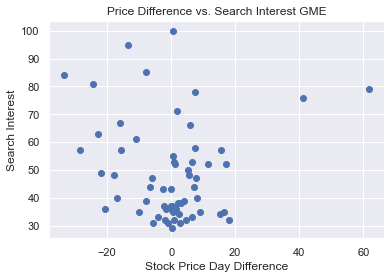

In [85]:
# Matplotlib
plt.scatter(GME_DF["Price Difference"].values, GME_DF["Google Searches"])
plt.xlabel('Stock Price Day Difference')
plt.ylabel('Search Interest')
plt.title('Price Difference vs. Search Interest GME')


Text(0.5, 1.0, 'Price Differnce and Interest Over Time GME')

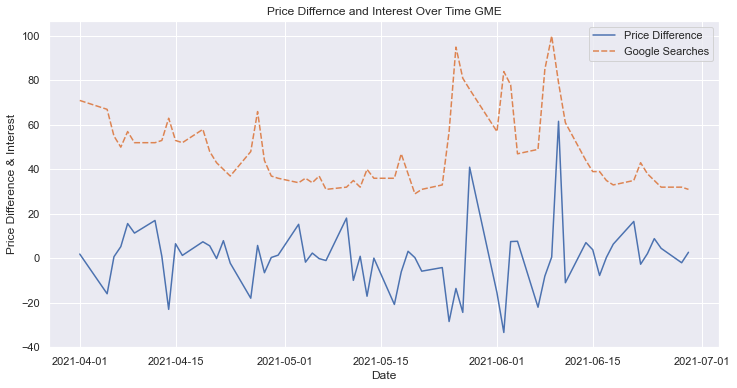

In [86]:
# Seaborne plot
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.lineplot(data=GME_DF[["Price Difference","Google Searches"]], ax=ax)
plt.xlabel("Date")
plt.ylabel("Price Difference & Interest")
plt.title("Price Differnce and Interest Over Time GME")

In [105]:
# Plotly
xValue = GME_DF.index
openGME = GME_DF['Open']
highGME = GME_DF['High']
lowGME = GME_DF['Low']
closeGME = GME_DF['Close']


fig = px.graph_objs.Figure(data=[px.graph_objs.candlestick(x=xValue,
                open=openGME,
                high=highGME,
                low=lowGME,
                close=closeGME)])

fig.show()


TypeError: 'module' object is not callable

In [106]:
fig = px.bar(GME_DF, x=GME_DF.index, y="Close")
fig.show()

AttributeError: module 'plotly' has no attribute 'bar'